#第3章　代表的な次元削減を行う10本ノック

## ノック21:PCAを実施してみよう

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.loc[df["target"]==0, "target_name"] = "setosa"
df.loc[df["target"]==1, "target_name"] = "versicolor"
df.loc[df["target"]==2, "target_name"] = "virginica"
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


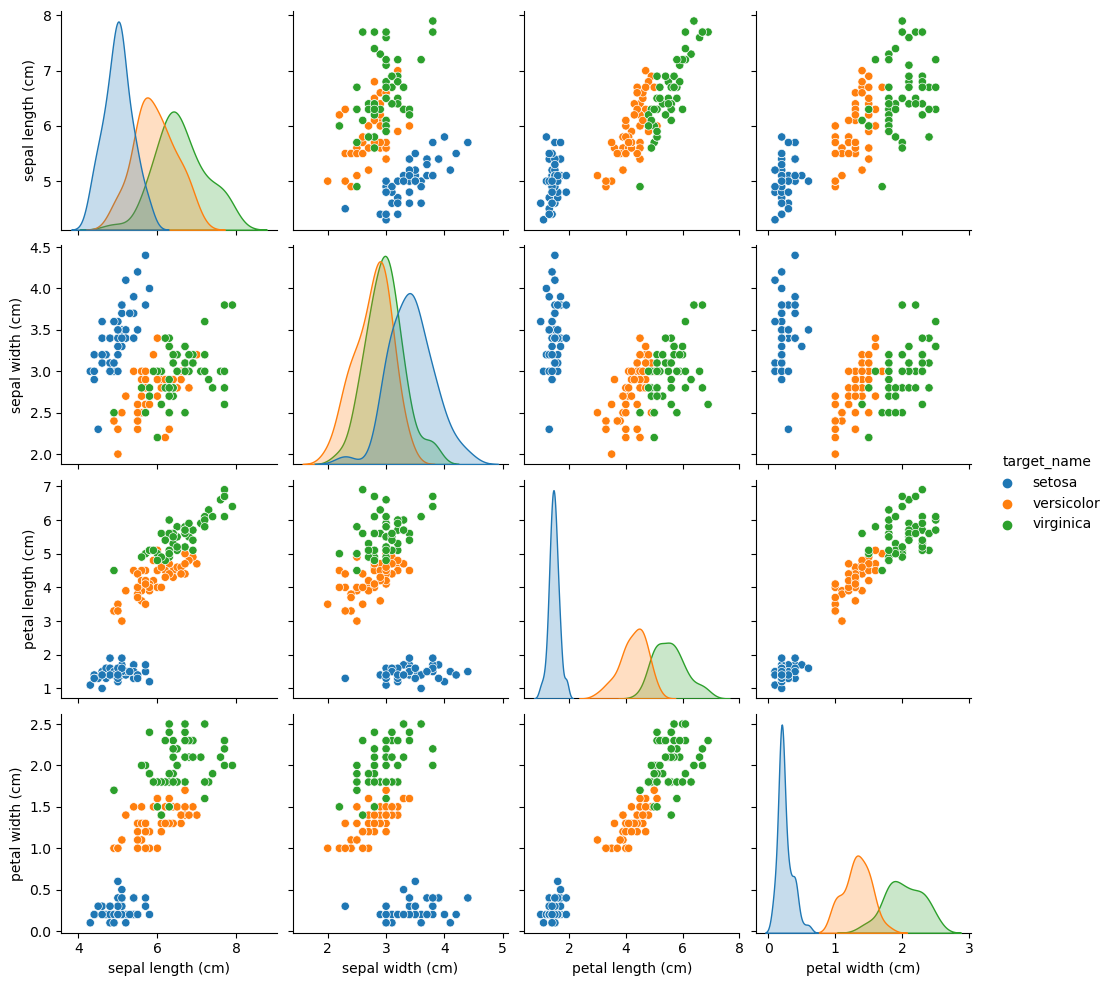

In [2]:
import seaborn as sns
sns.pairplot(df, vars=df.columns[:4], hue="target_name")

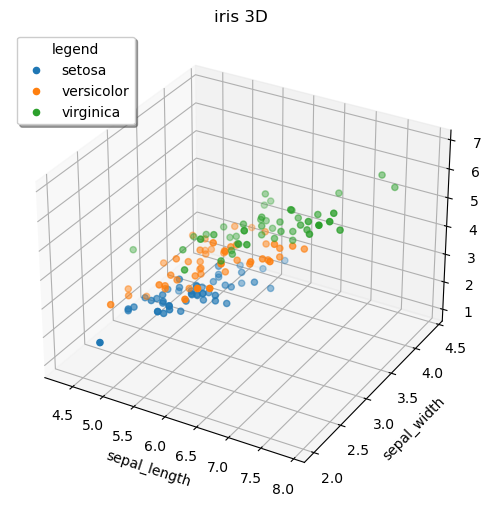

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection="3d")
for c in df["target_name"].unique():
    ax.scatter(df.iloc[:,0][df["target_name"]==c], df.iloc[:, 1][df["target_name"]==c], df.iloc[:, 2][df["target_name"]==c], label=c)
ax.set_title("iris 3D")
ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")
ax.set_zlabel("petal_length")
ax.legend(loc=2, title="legend", shadow=True)
plt.show()

In [4]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(random_state=0)
X_pc = pca.fit_transform(df.iloc[:, 0:4])
df_pca = pd.DataFrame(X_pc, columns=["PC{}".format(i+1) for i in range(len(X_pc[0]))])
print("主成分の数：", pca.n_components_)
print("保たれている情報：", np.sum(pca.explained_variance_ratio_))
display(df_pca.head())

主成分の数： 4
保たれている情報： 1.0


,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

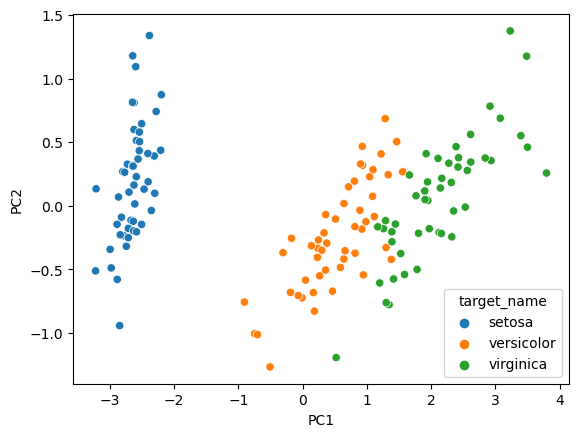

In [5]:
sns.scatterplot(x="PC1", y="PC2", data=df_pca, hue=df["target_name"])

## ノック22:主成分を解釈してみよう

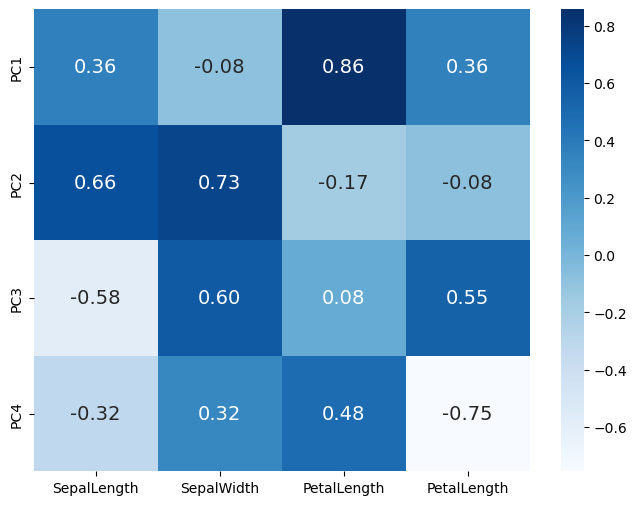

In [6]:
import seaborn as sns
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
sns.heatmap(pca.components_, cmap="Blues", annot=True, annot_kws={"size": 14}, fmt=".2f", xticklabels=["SepalLength", "SepalWidth", "PetalLength", "PetalLength"], yticklabels=["PC1", "PC2", "PC3", "PC4"], ax=ax)
plt.show()

## ノック23:スクリープロットで次元削減数を探索してみよう

In [7]:
df_wine=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df_wine.columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "0D280/0D315 of diluted wines", "Proline"]
display(df_wine.shape)
display(df_wine.head())

(178, 14)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


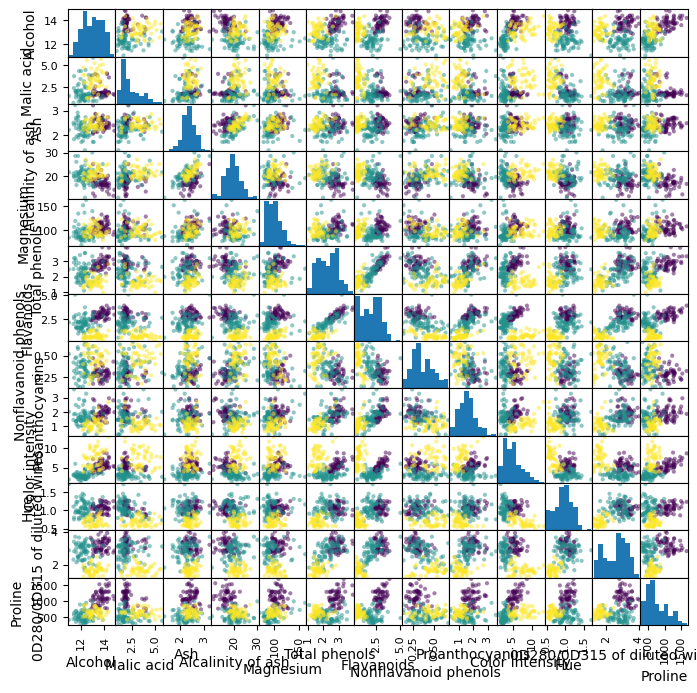

In [8]:
from pandas import plotting
plotting.scatter_matrix(df_wine.iloc[:, 1:], figsize=(8,8), c=list(df_wine.iloc[:, 0]), alpha=0.5)
plt.show()

In [9]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
sc=preprocessing.StandardScaler()
X = df_wine.iloc[:, 1:]
X_norm = sc.fit_transform(X)

pca = PCA(random_state=0)
X_pc = pca.fit_transform(X_norm)
df_pca = pd.DataFrame(X_pc, columns=["PC{}".format(i + 1) for i in range(len(X_pc[0]))])
print("主成分の数：", pca.n_components_)
print("保たれている情報：", round(np.sum(pca.explained_variance_ratio_), 2))
display(df_pca.head())

主成分の数： 13
保たれている情報： 1.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [10]:
pd.DataFrame(np.round(pca.explained_variance_, 2), index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))], columns=["固有値"])

,固有値
PC1,4.73
PC2,2.51
PC3,1.45
PC4,0.92
PC5,0.86
PC6,0.65
PC7,0.55
PC8,0.35
PC9,0.29
PC10,0.25


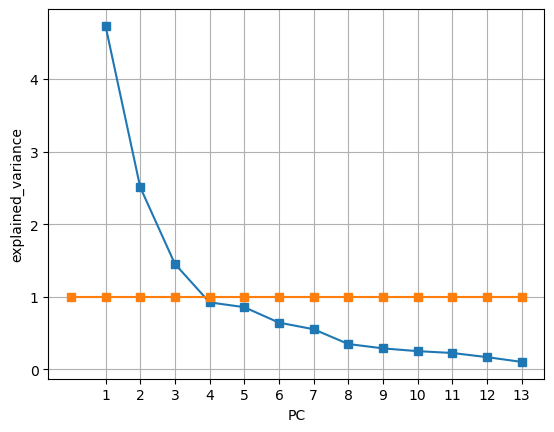

In [12]:
line = np.ones(14)
plt.plot(np.append(np.nan, pca.explained_variance_), "s-")
plt.plot(line, "s-")
plt.xlabel("PC")
plt.ylabel("explained_variance")
plt.xticks(np.arange(1, 14, 1))
plt.grid()
plt.show()

## ノック24:寄与率で次元削減数を探索してみよう

## ノック25:Isomapで次元削減を実施してみよう

## ノック26:t-SNEで次元削減を実施してみよう

## ノック27:t-SNEで最適なPerplexityを探索してみよう

## ノック28:UMAPで次元削減を実施してみよう

## ノック29:UMAPで最適なn_neighborsを探索してみよう

## ノック30:PCAとUMAPを組み合わせて次元削減を実施してみよう